<a id=0></a>
# 2. DataFrameを理解する

---
### [1.Arrayの作成、SeriesとDataFrameの作成 ](#1)
### [2.SeriesとDataFrame](#2)
### [3.DataFrameの基礎データとaxisの理解](#3)
### [4.IndexとColumnについて](#4)
### [5.欠損値](#5)
### [6.DataFrameを別のファイルとして保存](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1.Arrayの作成、SeriesとDataFrameの作成 

* 100 - 10000の整数データ (100,)からSeriesを作成
* Series と ndarry
* Seriesに名前を付ける
* 10 - 100の整数データ (100,)からSeriesを作成
* 0 - 10の小数データ (100, 2)からDataFrameを作成
* 40 - 60の範囲の一様分布の小数データ (100, 1)からDataFrameを作成
* 平均 0、標準偏差 1の正規分布に従う小数データ (100, 1)からDataFrameを作成
* 平均50、標準偏差10の正規分布に従う小数データ (100, 1)からDataFrameを作成
* ['red', 'green', 'blue'] (100, 1)、 ['circle', 'square', 'triangle'] (100, 1)、ndarrayを合しDataFrameを作成
* datetime 1997/7/5から1日刻み (100, 1)からDatetimeIndex、Seriesを作成
* Series, DataFrameを結合
* DataFrameのサンプル（レコード）の一部を抽出する
---

100 - 10000の整数データ (100,)からSeriesを作成

In [2]:
np.random.seed(17)
arr_int1 = np.random.randint(100, 10000, 100)

In [3]:
arr_int1[:5]
# arr_int1[10:15]

array([2291,  506, 9629, 6161, 8570])

In [4]:
# Seriesの作成
sr = pd.Series(arr_int1)
sr

0     2291
1      506
2     9629
3     6161
4     8570
      ... 
95    4285
96    9714
97    5113
98    5916
99    1578
Length: 100, dtype: int32

Series と ndarry

In [5]:
type(sr)

pandas.core.series.Series

In [6]:
# ndarrayのようにndim, shape, max()などを使用できる
# Seriesとndarrayは類似している
sr.ndim

1

In [7]:
sr.shape

(100,)

In [8]:
sr.max()

9991

In [9]:
# sr.reshape(2, 50)
# 形状の変更はできない。Seriesは1次元

Seriesに名前を付ける

In [10]:
sr.name = 'Price'

In [11]:
# Series作成時にnameを指定することもできる
sr_price = pd.Series(arr_int1, name='Price')
sr_price

0     2291
1      506
2     9629
3     6161
4     8570
      ... 
95    4285
96    9714
97    5113
98    5916
99    1578
Name: Price, Length: 100, dtype: int32

10 - 100の整数データ (100,)からSeriesを作成

In [12]:
np.random.seed(17)
arr_int2 = np.random.randint(10, 100, 100)
sr_quantity = pd.Series(arr_int2, name='Quantity')

0 - 10の小数データ (100, 2)からDataFrameを作成

In [13]:
np.random.seed(17)
arr_fl = np.random.rand(100, 2) * 10

# sr = pd.Series(arr_fl)
# ValueError: Data must be 1-dimensional　Seriesの場合は1次元リストでないといけない

In [14]:
# 2次元の場合はDataFrame
df = pd.DataFrame(arr_fl)
df

,0,1
0,2.946650,5.305868
1,1.915208,0.679004
2,7.869855,6.563335
3,6.375209,5.756029
4,0.390629,3.578136
...,...,...
95,9.133029,5.902204
96,1.711943,7.144745
97,2.384461,9.218051
98,7.212739,6.769230


In [15]:
# columnsでカラム名を指定（リストで）
df_wh = pd.DataFrame(arr_fl, columns=['Width', 'Height'])
df_wh

,Width,Height
0,2.946650,5.305868
1,1.915208,0.679004
2,7.869855,6.563335
3,6.375209,5.756029
4,0.390629,3.578136
...,...,...
95,9.133029,5.902204
96,1.711943,7.144745
97,2.384461,9.218051
98,7.212739,6.769230


40 - 60の範囲の一様分布の小数データ (100, 1)からDataFrameを作成

In [16]:
np.random.seed(17)
arr_uni = np.random.uniform(40, 60, (100, 1))

df_quality = pd.DataFrame(arr_uni, columns=['Quality'])
df_quality

,Quality
0,45.893300
1,50.611735
2,43.830416
3,41.358007
4,55.739709
...,...
95,41.603027
96,57.420940
97,54.261728
98,54.642241


平均 0、標準偏差 1の正規分布に従う小数データ (100, 1)からDataFrameを作成

In [17]:
np.random.seed(17)
# (100, 1)も2次元のためDataFrame
arr_n = np.random.randn(100, 1)
# カラム名がひとつの場合もリストで指定
df_difference = pd.DataFrame(arr_n, columns=['Difference'])

平均50、標準偏差10の正規分布に従う小数データ (100, 1)からDataFrameを作成

In [18]:
np.random.seed(17)
arr_nor = np.random.normal(50, 10, (100, 1))

df_score = pd.DataFrame(arr_nor, columns=['Score'])

['red', 'green', 'blue'] (100, 1)、 ['circle', 'square', 'triangle'] (100, 1)、ndarrayを結合しDataFrameを作成

In [19]:
np.random.seed(17)
colors = ['red', 'green', 'blue']
shapes = ['circle', 'square', 'triangle']
arr_colors = np.random.choice(colors, (100, 1))
arr_shapes = np.random.choice(shapes, (100, 1))

In [20]:
# numpy arrayの結合
# arr_cs = np.concatenate([arr_colors, arr_shapes])
# arr_cs
# axis=0がdefaultのため、行方向に結合してしまう

In [21]:
# axis=1で結合
arr_cs = np.concatenate([arr_colors, arr_shapes], axis=1)
arr_cs[:5]

array([['green', 'triangle'],
       ['blue', 'triangle'],
       ['blue', 'square'],
       ['green', 'square'],
       ['red', 'square']], dtype='<U8')

In [22]:
# horizontally
arr_cs_hstack = np.hstack([arr_colors, arr_shapes])
arr_cs_hstack[:5]

array([['green', 'triangle'],
       ['blue', 'triangle'],
       ['blue', 'square'],
       ['green', 'square'],
       ['red', 'square']], dtype='<U8')

In [23]:
# vertically
arr_cs_vstack = np.vstack([arr_colors, arr_shapes])
arr_cs_vstack[98:103]

array([['blue'],
       ['red'],
       ['triangle'],
       ['triangle'],
       ['square']], dtype='<U8')

In [24]:
df_cs = pd.DataFrame(arr_cs, columns=['Color', 'Shape'])

datetime 1997/7/5から1日刻み (100, 1)からDatetimeIndex、Seriesを作成

In [25]:
dates = pd.date_range('1997/7/5', periods=100, freq='D')
# D: 日, B: 月曜 - 金曜, W: 週（日曜から）,M: 月末, Y: 年末 
# H: 時, T: 分, S: 秒、など
# 2D, 12Hなどとして使用可
dates[:10]
dates[:5]

DatetimeIndex(['1997-07-05', '1997-07-06', '1997-07-07', '1997-07-08',
               '1997-07-09'],
              dtype='datetime64[ns]', freq='D')

In [26]:
# 1カラムとして扱う場合はDatetimeIndexからSeriesに変更しておく
sr_date = pd.Series(dates, name='Date')
type(sr_date)

pandas.core.series.Series

Series, DataFrameを結合

In [27]:
# Series, DataFrameの結合はpd.concat()
df = pd.concat([sr_date, sr_price, sr_quantity, df_wh, df_quality, df_score, df_difference, df_cs], axis=1)
df

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
...,...,...,...,...,...,...,...,...,...,...
95,1997-10-08,4285,50,9.133029,5.902204,41.603027,61.307264,1.130726,blue,circle
96,1997-10-09,9714,76,1.711943,7.144745,57.420940,55.600397,0.560040,red,triangle
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle


DataFrameのサンプル（レコード）の一部を抽出する

In [28]:
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [29]:
df.tail(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle
99,1997-10-12,1578,77,9.868106,5.397452,56.472400,72.159015,2.215901,red,circle


In [30]:
df.sample(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
13,1997-07-18,5863,27,1.509067,0.552414,57.545811,48.619507,-0.138049,green,triangle
92,1997-10-05,8057,60,5.927891,0.157152,59.760133,78.711269,2.871127,blue,square
18,1997-07-23,1933,73,6.767624,1.184723,49.670572,39.077701,-1.092230,blue,triangle


In [31]:
# サンプルをシャッフルすることもできる
df.sample(frac=1, random_state=17)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
71,1997-09-14,6801,99,3.606084,1.688734,44.727623,49.963040,-0.003696,blue,square
28,1997-08-02,3216,15,1.304293,9.843835,54.360744,42.447770,-0.755223,green,circle
9,1997-07-14,1874,94,4.835286,2.829882,47.156272,45.622168,-0.437783,red,circle
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
73,1997-09-16,6354,84,7.945283,7.917093,54.312865,56.844951,0.684495,green,triangle
...,...,...,...,...,...,...,...,...,...,...
45,1997-08-19,7708,36,5.156806,5.698250,54.871535,50.991466,0.099147,blue,triangle
57,1997-08-31,639,30,9.479230,1.300150,59.687671,61.854042,1.185404,red,triangle
22,1997-07-27,8521,67,7.187761,7.435768,47.920949,54.913338,0.491334,green,square
6,1997-07-11,3723,41,8.640421,8.772905,52.750418,48.883017,-0.111698,blue,circle


---
<a id=2></a>
[Topへ](#0)

---
## 2.SeriesとDataFrame

* SeriesとDataFrameの関係性
* Series、DataFrameをndarrayに変換
* Series、DataFrameをlistに変換
* Series、DataFrameをdictionaryに変換
* Seriesの作成
* DataFrameの作成
---

SeriesとDataFrameの関係性

In [32]:
sr_price.head()

0    2291
1     506
2    9629
3    6161
4    8570
Name: Price, dtype: int32

In [33]:
# DataFrameの1カラムはSeriesに等しい
df['Price'].head()

0    2291
1     506
2    9629
3    6161
4    8570
Name: Price, dtype: int32

In [34]:
type(df['Price'])

pandas.core.series.Series

In [35]:
df.Price.head()
# メソッドと間違えることもあるため基本的には['Price']を用いる

0    2291
1     506
2    9629
3    6161
4    8570
Name: Price, dtype: int32

Series、DataFrameをndarrayに変換

In [36]:
df['Price'].values

array([2291,  506, 9629, 6161, 8570, 9347, 3723, 4664, 3045, 1874, 5916,
       2926, 4678, 5863, 8099, 7530, 7434, 8255, 1933, 4893, 3445, 5202,
       8521, 4629, 2180, 2977,  266, 5222, 3216, 7194, 7645, 7921, 2716,
       4479, 2894, 8119, 9110, 4768, 3180,  535, 2431, 4063, 6307, 1150,
       3263, 7708,  722, 1838, 4710, 1429, 3349, 9900, 1584,  888, 4467,
       7304, 3649,  639, 3863, 7409, 3193, 1648, 9085,  975, 3773, 7399,
       5294, 4513, 1991, 5535, 5523, 6801, 5985, 6354, 1554, 4239, 5511,
       4002, 7804, 2343, 4086, 9187, 4236, 2854, 1864, 6035, 7975, 8538,
       1702,  860, 2078, 2427, 8057, 7691, 9991, 4285, 9714, 5113, 5916,
       1578])

In [37]:
df.values[:2]

array([[Timestamp('1997-07-05 00:00:00'), 2291, 25, 2.9466500268710973,
        5.305867556052942, 45.893300053742195, 52.76265890021319,
        0.27626589002131874, 'green', 'triangle'],
       [Timestamp('1997-07-06 00:00:00'), 506, 16, 1.9152078694749486,
        0.6790035819129137, 50.61173511210588, 31.45371921193495,
        -1.854628078806505, 'blue', 'triangle']], dtype=object)

Series、DataFrameをlistに変換

In [38]:
df['Price'].tolist()[:5]

[2291, 506, 9629, 6161, 8570]

In [39]:
# DataFrameの場合は一度ndarrayにしてからリストへ
df.values.tolist()[:3]

[[Timestamp('1997-07-05 00:00:00'),
  2291,
  25,
  2.9466500268710973,
  5.305867556052942,
  45.893300053742195,
  52.76265890021319,
  0.27626589002131874,
  'green',
  'triangle'],
 [Timestamp('1997-07-06 00:00:00'),
  506,
  16,
  1.9152078694749486,
  0.6790035819129137,
  50.61173511210588,
  31.45371921193495,
  -1.854628078806505,
  'blue',
  'triangle'],
 [Timestamp('1997-07-07 00:00:00'),
  9629,
  32,
  7.869854599999133,
  6.563335217758555,
  43.830415738949895,
  56.239011113263565,
  0.6239011113263563,
  'blue',
  'square']]

Series、DataFrameをdictionaryに変換

In [40]:
df['Price'].to_dict()

{0: 2291,
 1: 506,
 2: 9629,
 3: 6161,
 4: 8570,
 5: 9347,
 6: 3723,
 7: 4664,
 8: 3045,
 9: 1874,
 10: 5916,
 11: 2926,
 12: 4678,
 13: 5863,
 14: 8099,
 15: 7530,
 16: 7434,
 17: 8255,
 18: 1933,
 19: 4893,
 20: 3445,
 21: 5202,
 22: 8521,
 23: 4629,
 24: 2180,
 25: 2977,
 26: 266,
 27: 5222,
 28: 3216,
 29: 7194,
 30: 7645,
 31: 7921,
 32: 2716,
 33: 4479,
 34: 2894,
 35: 8119,
 36: 9110,
 37: 4768,
 38: 3180,
 39: 535,
 40: 2431,
 41: 4063,
 42: 6307,
 43: 1150,
 44: 3263,
 45: 7708,
 46: 722,
 47: 1838,
 48: 4710,
 49: 1429,
 50: 3349,
 51: 9900,
 52: 1584,
 53: 888,
 54: 4467,
 55: 7304,
 56: 3649,
 57: 639,
 58: 3863,
 59: 7409,
 60: 3193,
 61: 1648,
 62: 9085,
 63: 975,
 64: 3773,
 65: 7399,
 66: 5294,
 67: 4513,
 68: 1991,
 69: 5535,
 70: 5523,
 71: 6801,
 72: 5985,
 73: 6354,
 74: 1554,
 75: 4239,
 76: 5511,
 77: 4002,
 78: 7804,
 79: 2343,
 80: 4086,
 81: 9187,
 82: 4236,
 83: 2854,
 84: 1864,
 85: 6035,
 86: 7975,
 87: 8538,
 88: 1702,
 89: 860,
 90: 2078,
 91: 2427,
 92: 8

In [41]:
df.to_dict()
df.to_dict(orient='records')
# orient='records'でサンプルごとを取り出せる

[{'Date': Timestamp('1997-07-05 00:00:00'),
  'Price': 2291,
  'Quantity': 25,
  'Width': 2.9466500268710973,
  'Height': 5.305867556052942,
  'Quality': 45.893300053742195,
  'Score': 52.76265890021319,
  'Difference': 0.27626589002131874,
  'Color': 'green',
  'Shape': 'triangle'},
 {'Date': Timestamp('1997-07-06 00:00:00'),
  'Price': 506,
  'Quantity': 16,
  'Width': 1.9152078694749486,
  'Height': 0.6790035819129137,
  'Quality': 50.61173511210588,
  'Score': 31.45371921193495,
  'Difference': -1.854628078806505,
  'Color': 'blue',
  'Shape': 'triangle'},
 {'Date': Timestamp('1997-07-07 00:00:00'),
  'Price': 9629,
  'Quantity': 32,
  'Width': 7.869854599999133,
  'Height': 6.563335217758555,
  'Quality': 43.830415738949895,
  'Score': 56.239011113263565,
  'Difference': 0.6239011113263563,
  'Color': 'blue',
  'Shape': 'square'},
 {'Date': Timestamp('1997-07-08 00:00:00'),
  'Price': 6161,
  'Quantity': 67,
  'Width': 6.375208960436359,
  'Height': 5.75602893753034,
  'Quality': 

Seriesの作成

In [42]:
arr = np.random.randint(0, 100, 8)
pd.Series(arr, name='sample', index=list('ABCDEFGH'))

A    84
B    10
C    31
D    92
E    42
F    67
G     7
H    61
Name: sample, dtype: int32

In [43]:
pd.Series({"A":1, "B":2, "C":3}, name='sample')

A    1
B    2
C    3
Name: sample, dtype: int64

DataFrameの作成

In [44]:
pd.DataFrame([{"A":1, "B":2, "C":3}, {"A":10, "C":30, "B":20}], index=["x", "y"])
# キーがカラム名

,A,B,C
x,1,2,3
y,10,20,30


In [45]:
arr1 = np.random.rand(10)
arr2 = np.random.randn(10)
pd.DataFrame([arr1, arr2])

,0,1,2,3,4,5,6,7,8,9
0,0.132036,0.529263,0.135220,0.276802,0.004602,0.431318,0.233486,0.001938,0.816954,0.617396
1,-0.483602,0.869613,-0.398346,0.449468,2.978047,0.960284,0.970523,-1.682364,1.329373,-0.654708


---
<a id=3></a>
[Topへ](#0)

---
## 3.DataFrameの基礎データとaxisの理解

* len(df) : レコード数
* df.info() : null, dtypeなど
* df.size : 要素数
* df.shape : index * columns
* df.count : 個数（要素の数）
* df.sum() : 合計（要素の値の合計）
---

len(df) : レコード数

In [46]:
len(df)

100

df.info() : null, dtypeなど

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Price       100 non-null    int32         
 2   Quantity    100 non-null    int32         
 3   Width       100 non-null    float64       
 4   Height      100 non-null    float64       
 5   Quality     100 non-null    float64       
 6   Score       100 non-null    float64       
 7   Difference  100 non-null    float64       
 8   Color       100 non-null    object        
 9   Shape       100 non-null    object        
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 7.2+ KB


df.size : 要素数

In [48]:
# rows * columns
df.size

1000

df.shape : index * columns

In [49]:
df.shape

(100, 10)

df.count() : 個数（要素の数）

In [50]:
df.count()

Date          100
Price         100
Quantity      100
Width         100
Height        100
Quality       100
Score         100
Difference    100
Color         100
Shape         100
dtype: int64

In [51]:
# df.count(axis=1)

In [52]:
df.count().count()
# 数値の足し合わせではなく、あくまでも個数を数える

10

In [53]:
type(df.count())

pandas.core.series.Series

df.sum() : 合計（要素の値の合計）

In [54]:
df.sum()

C:\Users\kirit\AppData\Local\Temp\ipykernel_16936\1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


Price                                                    475938
Quantity                                                   5014
Width                                                517.582747
Height                                               512.554742
Quality                                             5020.788093
Score                                               5111.509794
Difference                                            11.150979
Color         greenbluebluegreenredgreenblueredredredgreenbl...
Shape         triangletrianglesquaresquaresquaretrianglecirc...
dtype: object

In [55]:
df.sum(numeric_only=True)

Price         475938.000000
Quantity        5014.000000
Width            517.582747
Height           512.554742
Quality         5020.788093
Score           5111.509794
Difference        11.150979
dtype: float64

In [56]:
df.select_dtypes(include=['int', 'float']).sum()

Price         475938.000000
Quantity        5014.000000
Width            517.582747
Height           512.554742
Quality         5020.788093
Score           5111.509794
Difference        11.150979
dtype: float64

In [57]:
df.sum(axis=1)[:2]

C:\Users\kirit\AppData\Local\Temp\ipykernel_16936\1541225867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)[:2]


0    2423.184742
1     604.805038
dtype: float64

axisの理解

In [58]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [59]:
arr.shape

(3, 4)

In [60]:
arr.sum(), arr.max()
# axisを指定しなければ全要素を対象にする

(66, 11)

In [61]:
arr.sum(axis=0), arr.max(axis=0)

(array([12, 15, 18, 21]), array([ 8,  9, 10, 11]))

In [62]:
arr.sum(axis=1), arr.max(axis=1)

(array([ 6, 22, 38]), array([ 3,  7, 11]))

In [63]:
arr.sum(axis=0)

array([12, 15, 18, 21])

In [64]:
arr.sum(axis=1)

array([ 6, 22, 38])

In [65]:
arr = arr.reshape(2, 3, 2)
arr

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [66]:
arr.sum(axis=1)

array([[ 6,  9],
       [24, 27]])

In [67]:
arr.sum(axis=2)

array([[ 1,  5,  9],
       [13, 17, 21]])

---
<a id=4></a>
[Topへ](#0)

---
## 4.IndexとColumnについて

* indexとcolumnsの取得
* indexの設定とリセット
* indexラベル、columnラベルの変更
---

indexとcolumnsの取得

In [68]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [69]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [70]:
pd.RangeIndex(1, 20, 4).values
# 無理に使う必要はない。ndarrayをindexに指定すればよい

array([ 1,  5,  9, 13, 17], dtype=int64)

In [71]:
df.columns

Index(['Date', 'Price', 'Quantity', 'Width', 'Height', 'Quality', 'Score',
       'Difference', 'Color', 'Shape'],
      dtype='object')

In [72]:
type(df.columns)
# いろいろな「型」が存在するが、詳細まで知っていなくてもよい

pandas.core.indexes.base.Index

indexの設定とリセット

In [73]:
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [74]:
df.set_index('Date', inplace=True)
# カラム名を指定し、インデックスとする

In [75]:
df.head(3)

,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
Date,,,,,,,,,
1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [76]:
df.reset_index(inplace=True)
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


indexラベル、columnラベルの変更

In [77]:
cols = df.columns

In [78]:
df.rename(index={0:'ZERO'}, columns={'Date':'Time'})   # inplace=Trueは設定せず

,Time,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
ZERO,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
...,...,...,...,...,...,...,...,...,...,...
95,1997-10-08,4285,50,9.133029,5.902204,41.603027,61.307264,1.130726,blue,circle
96,1997-10-09,9714,76,1.711943,7.144745,57.420940,55.600397,0.560040,red,triangle
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle


In [79]:
# 直接書き換える
df.index = np.arange(100, 200)
df.head(3) 

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [80]:
# 直接書き換える
df.columns = list('ABCDEFGHIJ')
df.head(3)

,A,B,C,D,E,F,G,H,I,J
100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [81]:
df = df.add_prefix('#')
df.head(3)
# suffix

,#A,#B,#C,#D,#E,#F,#G,#H,#I,#J
100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [82]:
# dropで以前のインデックスを削除する
df.reset_index(inplace=True, drop=True)
df.head(3)

,#A,#B,#C,#D,#E,#F,#G,#H,#I,#J
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [83]:
df.columns = cols
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


---
<a id=5></a>
[Topへ](#0)

---
## 5.欠損値

* None, null, np.nanを確認
* DataFrameの欠損値はNoneもしくはnp.nanで置き換える
* df.isnull()の使い方
* 欠損値のある行を表示
* nullは平均値の計算などに影響するか
* 欠損値を視覚化
---

None, null, np.nanを確認

In [84]:
print(None)

None


In [85]:
print(np.nan)

nan


DataFrameの欠損値はNoneもしくはnp.nanで置き換える

In [86]:
null_values = [None, np.nan]

In [87]:
for i in range(30):
  np.random.seed(i)   # ひとつの数字ではs, t, uは常に同じ数字になってしまう
  s = np.random.randint(0, 100)
  t = np.random.randint(0, 10)
  u = np.random.randint(0, 2)
  df.iloc[s, t] = null_values[u]

In [88]:
df.sample(5)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
12,1997-07-17,4678,11,4.184844,1.439039,57.280842,31.811877,-1.818812,green,triangle
89,1997-10-02,860,20,8.438626,1.365645,59.206916,44.121192,-0.587881,red,circle
7,1997-07-12,4664,78,0.511937,6.524186,51.512058,46.378987,-0.362101,red,square
76,1997-09-19,5511,43,6.500964,7.182418,57.170493,44.590201,-0.540980,green,triangle
8,1997-07-13,3045,49,5.517514,5.975133,40.781258,51.486750,0.148675,red,triangle


df.isnull()の使い方

In [89]:
df.isnull()

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


In [90]:
df.isnull().sum()

Date          3
Price         0
Quantity      0
Width         3
Height        3
Quality       4
Score         7
Difference    1
Color         4
Shape         5
dtype: int64

In [91]:
df.isnull().sum().sum()

30

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        97 non-null     datetime64[ns]
 1   Price       100 non-null    int32         
 2   Quantity    100 non-null    int32         
 3   Width       97 non-null     float64       
 4   Height      97 non-null     float64       
 5   Quality     96 non-null     float64       
 6   Score       93 non-null     float64       
 7   Difference  99 non-null     float64       
 8   Color       96 non-null     object        
 9   Shape       95 non-null     object        
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 7.2+ KB


In [93]:
df.isnull().count()
# True, Falseそれぞれをひとつの値としてカウントする

Date          100
Price         100
Quantity      100
Width         100
Height        100
Quality       100
Score         100
Difference    100
Color         100
Shape         100
dtype: int64

In [94]:
df.isnull().size
# rows * columns

1000

In [95]:
df.count()
# nullをカウントしない

Date           97
Price         100
Quantity      100
Width          97
Height         97
Quality        96
Score          93
Difference     99
Color          96
Shape          95
dtype: int64

欠損値のある行を表示

In [96]:
df.isnull().sum()

Date          3
Price         0
Quantity      0
Width         3
Height        3
Quality       4
Score         7
Difference    1
Color         4
Shape         5
dtype: int64

In [97]:
df.isnull().sum(axis=1)

0     0
1     1
2     0
3     0
4     2
     ..
95    0
96    0
97    0
98    0
99    2
Length: 100, dtype: int64

In [98]:
0 < df.isnull().sum(axis=1)

0     False
1      True
2     False
3     False
4      True
      ...  
95    False
96    False
97    False
98    False
99     True
Length: 100, dtype: bool

In [99]:
# df[np.random.choice([True, False], 100)]
# Trueならば抽出され、Falseならば抽出されない

In [100]:
# df[CONDITION]
df[0 < df.isnull().sum(axis=1)]

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,NaN
4,NaT,8570,55,0.390629,3.578136,55.739709,NaN,1.037190,red,square
9,1997-07-14,1874,94,4.835286,NaN,47.156272,45.622168,-0.437783,red,circle
10,1997-07-15,5916,54,2.977257,5.615089,58.913664,71.712570,2.171257,green,NaN
15,1997-07-20,7530,66,1.987739,8.313639,53.048372,NaN,-1.775282,blue,square
19,1997-07-24,4893,16,4.449961,8.879824,45.659763,47.499726,-0.250027,None,circle
24,1997-07-29,2180,27,7.769746,8.379915,48.369688,41.936399,-0.806360,green,NaN
25,NaT,2977,59,8.293048,0.291570,42.878078,51.312678,0.131268,green,triangle
34,1997-08-08,2894,66,NaN,9.161101,50.899971,59.682053,0.968205,blue,square
37,1997-08-11,4768,60,0.827355,6.754864,42.369445,54.652823,0.465282,NaN,circle


In [101]:
df[0 < df.isnull().sum(axis=1)].style.highlight_null(null_color='#f00')

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
1,1997-07-06 00:00:00,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,nan
4,NaT,8570,55,0.390629,3.578136,55.739709,nan,1.037190,red,square
9,1997-07-14 00:00:00,1874,94,4.835286,nan,47.156272,45.622168,-0.437783,red,circle
10,1997-07-15 00:00:00,5916,54,2.977257,5.615089,58.913664,71.712570,2.171257,green,nan
15,1997-07-20 00:00:00,7530,66,1.987739,8.313639,53.048372,nan,-1.775282,blue,square
19,1997-07-24 00:00:00,4893,16,4.449961,8.879824,45.659763,47.499726,-0.250027,None,circle
24,1997-07-29 00:00:00,2180,27,7.769746,8.379915,48.369688,41.936399,-0.806360,green,nan
25,NaT,2977,59,8.293048,0.291570,42.878078,51.312678,0.131268,green,triangle
34,1997-08-08 00:00:00,2894,66,nan,9.161101,50.899971,59.682053,0.968205,blue,square
37,1997-08-11 00:00:00,4768,60,0.827355,6.754864,42.369445,54.652823,0.465282,nan,circle


nullは平均値の計算などに影響するか

In [102]:
df['Score'].mean()

51.022066593933225

In [103]:
df['Score'].sum()

4745.05219323579

In [104]:
df['Score'].sum() / df['Score'].mean()

93.0

In [105]:
df['Score'].count()

93

欠損値の有無を視覚化  
※ seabornやグラフについての詳細は別のレクチャーで解説します

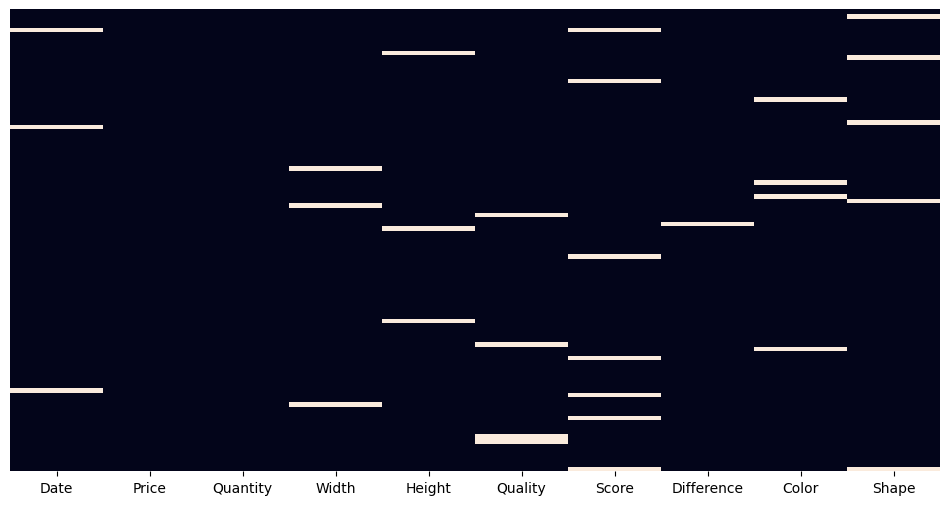

In [106]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

---
<a id=6></a>
[Topへ](#0)

---
## 6.DataFrameを別のファイルとして保存
---

In [107]:
# df.to_csv('/drive/My Drive/sample1_with_index.csv')
df.to_csv('./data/sample1_with_index.csv')

In [108]:
# df.to_csv('/drive/My Drive/sample1_without_index.csv', index=False)
df.to_csv('./data/sample1_without_index.csv', index=False)

In [109]:
# df.to_pickle('/drive/My Drive/sample1.pkl')
df.to_pickle('./data/sample1.pkl')

---
[Topへ](#0)

---
## 以上
---